#Contents
<a href='#Housekeeping'>1. Housekeeping</a>  <br>
<a href='#peak-file-$\rightarrow$-sizedistribution'>2. peak-file-$\rightarrow$-sizedistribution</a> <br>
<a href='#Raw-data'>3. Raw data</a>    
<a href='#Mie-calculation'>4. Mie calculation</a>    

# 0. Imports

In [1]:
import sys
from atmPy.instruments.POPS import calibration,peaks,housekeeping, raw, mie
import atmPy.tools.plt_tools as mtools
from atmPy import sizedistribution
%matplotlib inline
mtools.setRcParams(plt)

In [2]:
# This does not work in Python 3 ... maybe soon?!?
# %load_ext secnum
# %secnum

# Housekeeping

In [3]:
fname = 'data/POPS_housekeeping.csv'
hk = housekeeping.read_housekeeping(fname)

hk is a pandas opbject, with its various plotting options. To plot a particular column:

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


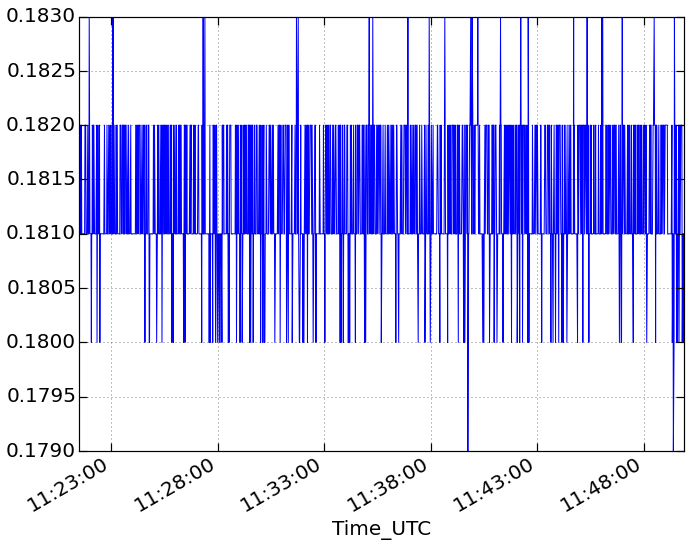

In [4]:
axes = hk.POPS_Flow.plot()

To plot everthing in a different plot:

# peak file $\rightarrow$ sizedistribution

## read a peak file

In [5]:
fname = 'data/20150203_002_POPS_Peak.bin'
m = peaks.read_PeakFile_Binary(fname)

## calibrate peak file

### load calibration

In [6]:
fname_cal = 'data/POPS_calibration.csv'
cal = calibration.read_Calibration_fromFile(fname_cal)

(<matplotlib.figure.Figure at 0x10d80beb8>,
 <matplotlib.lines.Line2D at 0x10d7f9dd8>)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


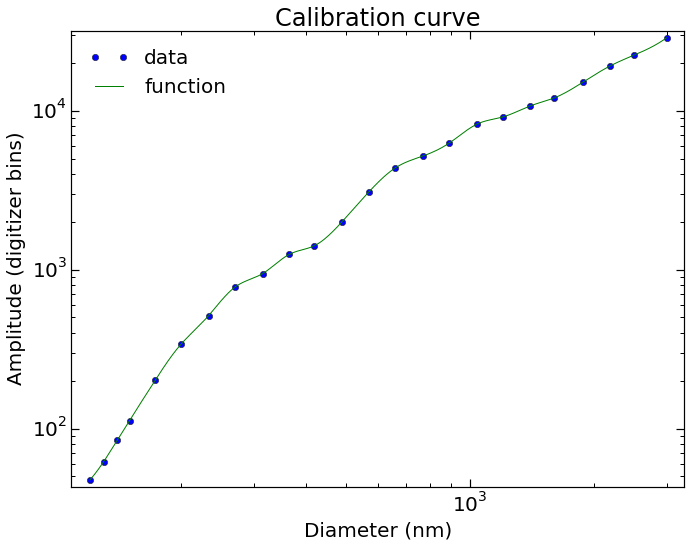

In [7]:
cal.plot_calibration()

### apply calibration to peaks

In [8]:
m.apply_calibration(cal)

	 5539 from 667882 peaks (0 %) are outside the calibration range (amplitude = [47.53352259428051, 28840.315031266065], diameter = [120, 3000])
		 5515 too small
		 24 too big


## create sizedistribution

In [9]:
bins = np.logspace(np.log10(120),np.log10(3000), 100)
dist = m.peak2numberdistribution(bins = bins)

/Users/htelg/prog/atm-py/atmPy/sizedistribution.py:145: UserWarning: The dataset provided had 11 gaps
  warnings.warn('The dataset provided had %s gaps' % len(where))


## save/load sizedistribution

### save

In [10]:
distfname = fname+'_distribution.csv'
dist.save_csv(distfname)

### load

In [11]:
distfname = 'data/20150203_002_POPS_Peak.bin_distribution.csv'
dist = sizedistribution.read_distribution_csv(distfname)

## plot sizedistribution

(<matplotlib.figure.Figure at 0x10e137e80>,
 <matplotlib.colorbar.Colorbar at 0x10ed415c0>)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


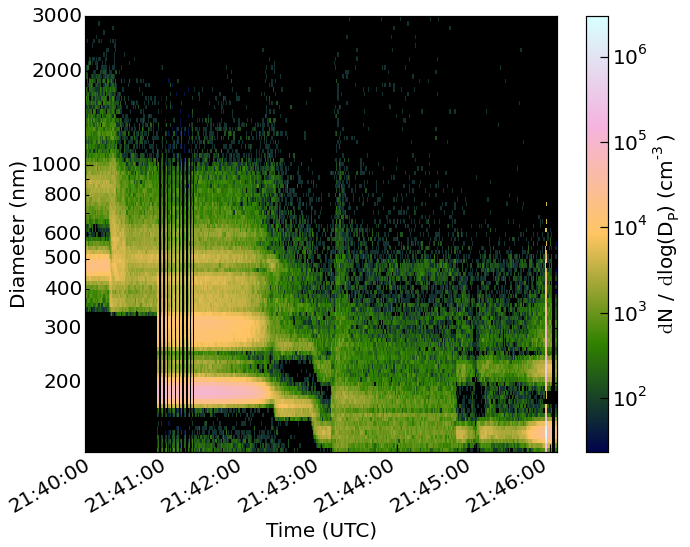

In [13]:
dist = dist.convert2dNdlogDp()
dist.plot(norm = 'log')

# Raw data

In [14]:
from atmPy.instruments.POPS import raw

In [15]:
fname = 'data/POPS_Raw.bin'
rawInt = raw.load_raw(fname)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


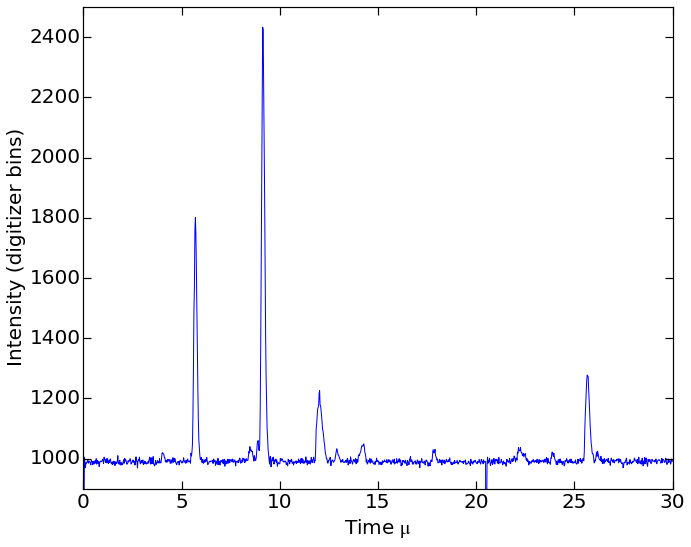

In [16]:
f,a = plt.subplots()
t = np.arange(len(rawInt))* 1/40.
a.plot(t, rawInt)
a.set_ylim((900,2500))
a.set_xlim((0,30))
a.set_xlabel('Time $\mu$')
a.set_ylabel('Intensity (digitizer bins)')

# Mie calculation

In [19]:
d,amp = mie.makeMie_diameter(noOfdiameters=1000)

1/1 wavelength


(0.089999999999999997, 3.3000000000000003)

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


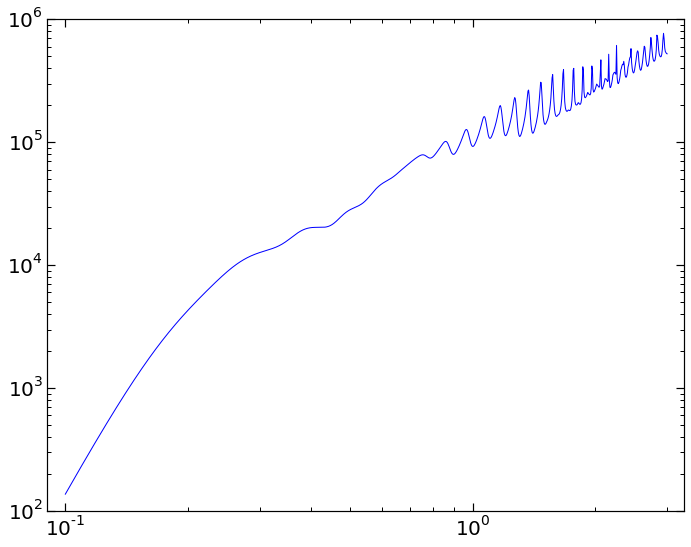

In [21]:
f,a = plt.subplots()
a.plot(d,amp)
a.loglog()
a.set_xlim((d.min()*0.9, d.max()*1.1))